Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Загрузим датасет  
  
Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Импортируем os, чтобы найти путь к датасету:

In [2]:
import os

In [4]:
os.listdir('lesson_5')

['data.csv.zip', 'transaction_data.csv', 'transaction_data_updated.csv']

Импортируем pandas и загружаем dataset

In [6]:
import pandas as pd
df = pd.read_csv('lesson_5/transaction_data.csv')

In [7]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [9]:
df.shape

(5315, 3)

In [10]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [11]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [13]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


# Преобработка данных

Преобрзуем дату в колонке date из object в дату

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

Узнаем, какие значения находятся в колонке transaction?   


In [18]:
set(df['transaction'].values)

{'cancelled', 'error', 'successfull'}

Узнаем, сколько наблюдений относятся к тому или иному уровню?

In [34]:
counts_df = df.groupby('transaction',as_index=False) \
    .agg({'name':'count'}) \
    .rename(columns = {'transaction':'transaction_type','name':'count'})
counts_df

,transaction_type,count
0,cancelled,1619
1,error,4
2,successfull,3692


Визуализируем результат с помощью барплота.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import plotly.express as px

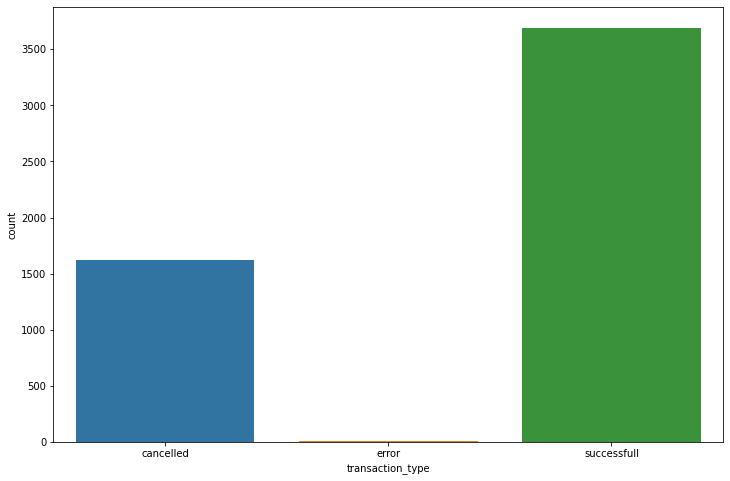

In [52]:
plt.figure(figsize=(12,8))
sns.despine;
ax = sns.barplot(data = counts_df, x = 'transaction_type', y='count')

Посмотрим, сколько транзакций завершилось ошибкой:

In [60]:
counts_df[counts_df['transaction_type']=='error']

,transaction_type,count
1,error,4


Как видно, ошибкой завершилось 4 транзакции. Посмотрим полный лог:

In [62]:
df[df['transaction']=='error']

,date,name,transaction
445,2020-03-02 00:22:53,Julia_Petrova,error
1415,2020-03-02 00:44:36,Ekaterina_Ozerova,error
4542,2020-03-02 00:13:27,Vasilisa_Ozerova,error
4695,2020-03-02 01:07:41,Ekaterina_Polyanova,error


# Узнаем, сколько успешных транзакций осуществил каждый из пользователей   
Также построим гистограмму распределения числа успешных транзакций.

In [89]:
success_trans = df[df['transaction']=='successfull']
success_trans = success_trans.groupby('name',as_index=True) \
                             .agg({'transaction':'count'})
success_trans

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68
Ekaterina_Polyanova,68
Ekaterina_Smirnova,77
Irina_Fedorova,62
Irina_Ivanova,60


c:\users\сергей\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


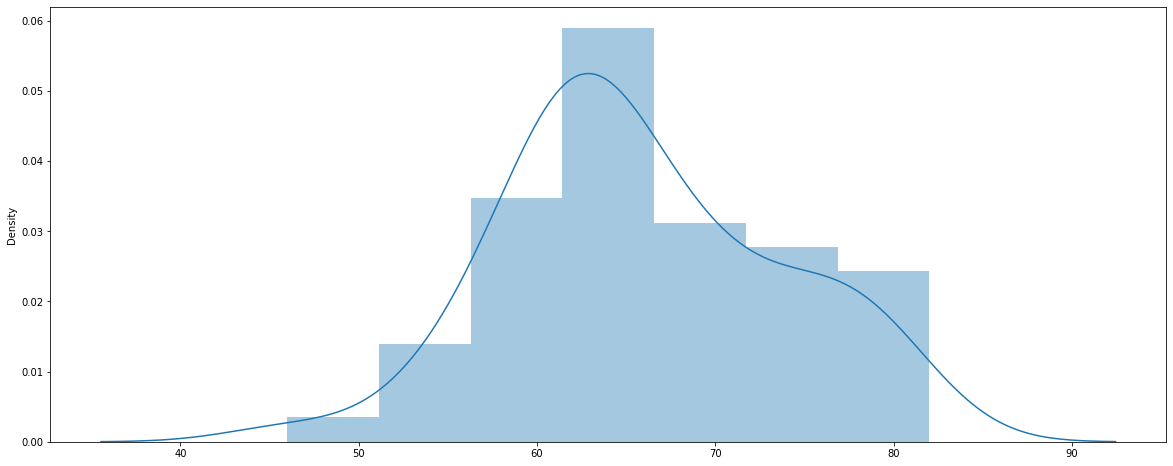

In [91]:
plt.figure(figsize=(20,8))
ax = sns.distplot(success_trans);

# Обновлённые данные

Мы получили обновленные данные - (transaction_data_updated.csv)  

In [93]:
updated_df = pd.read_csv(r'lesson_5/transaction_data_updated.csv')

In [95]:
updated_df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [96]:
updated_df['date'] = pd.to_datetime(updated_df['date'])

In [104]:
updated_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту.
Пропущенные значения заполните нулями  

In [125]:
updated_df['minute'] = updated_df.date.dt.minute

In [127]:
updated_df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [190]:
updated_df_minute_group = updated_df.groupby(['minute','name'],as_index=False) \
                                    .agg({'transaction':'count'}) \
                                    .pivot(columns='name',
                                           index = 'minute',
                                           values = 'transaction')
updated_df_minute_group.head(10)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [193]:
updated_df_minute_group.replace([None], [0],inplace=True)
updated_df_minute_group.head(10)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


# Построим график

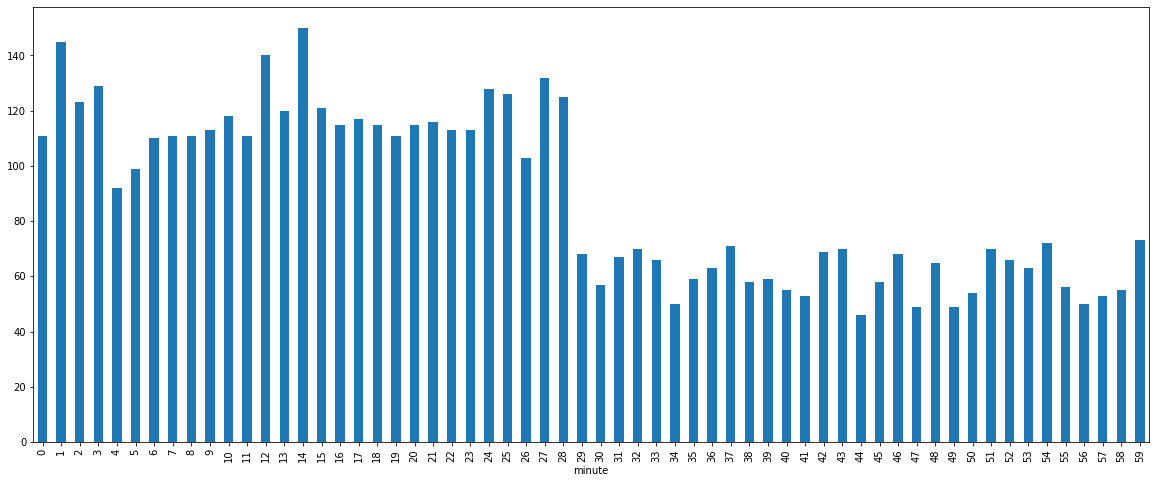

In [194]:
plt.figure(figsize=(20,8))
ax = updated_df_minute_group.sum(axis=1).plot.bar()

# Устранение аномалии увеличенного среднего первой половины графика:

In [195]:
updated_df['true_minute'] = updated_df.date.dt.minute + updated_df.date.dt.hour * 60

In [196]:
updated_df_true_minute_group  = updated_df.groupby(['true_minute','name'],as_index=False) \
                                    .agg({'transaction':'count'}) \
                                    .pivot(columns='name',
                                           index = 'true_minute',
                                           values = 'transaction')
updated_df_true_minute_group.fillna(0,inplace=True)

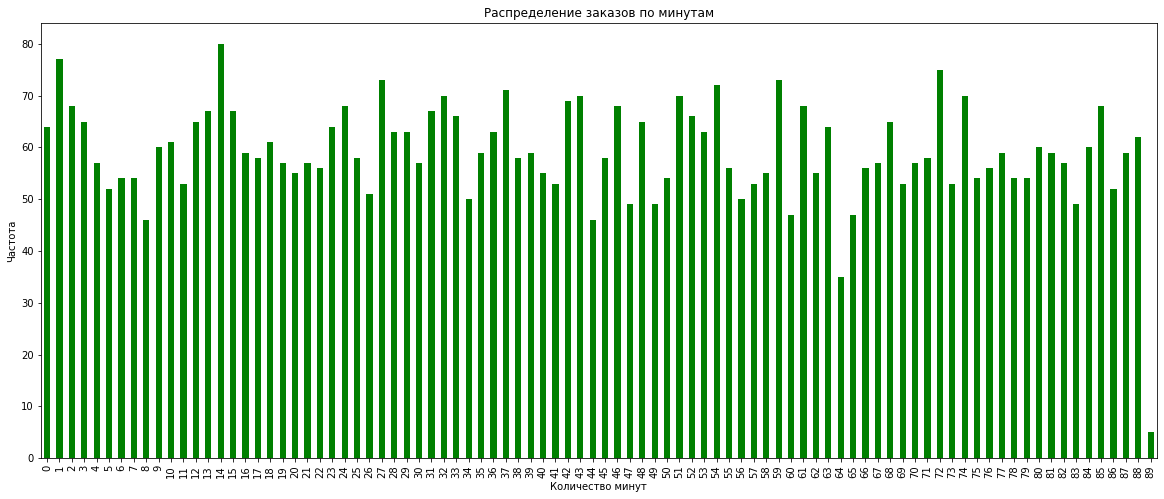

In [198]:
plt.figure(figsize=(20,8))
ax = updated_df_true_minute_group.sum(axis=1).plot.bar(color='g',
                                                       xlabel='Количество минут',
                                                       ylabel='Частота',
                                                       title='Распределение заказов по минутам')